C:\Users\mpbac\AppData\Local\Temp\ipykernel_23056\1959750481.py:5: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  face_images_db = np.load('archive/face_images.npz')['face_images']


number of remaining images = 2140
image dimentions = (96,96)
number of facial keypoints = 15


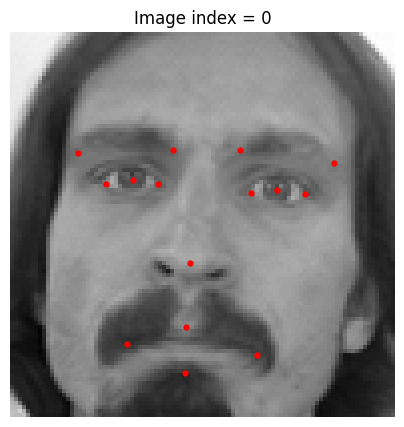

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

face_images_db = np.load('archive/face_images.npz')['face_images']
facial_keypoints_df = pd.read_csv('archive/facial_keypoints.csv')

numMissingKeypoints = facial_keypoints_df.isnull().sum(axis=1)
allKeypointsPresentInds = np.nonzero(numMissingKeypoints == 0)[0]

faceImagesDB = face_images_db[:,:,allKeypointsPresentInds]
facialKeypointsDF = facial_keypoints_df.iloc[allKeypointsPresentInds,:].reset_index(drop=True)

(imHeight, imWidth, numImages) = faceImagesDB.shape
numKeypoints = facialKeypointsDF.shape[1] / 2

print('number of remaining images = %d' %(numImages))
print('image dimentions = (%d,%d)' %(imHeight,imWidth))
print('number of facial keypoints = %d' %(numKeypoints))

image_number = 0
# Load the first image and its keypoints
image = face_images_db[:, :, image_number]
x_feature_coords = np.array(facial_keypoints_df.iloc[image_number, 0:30:2].tolist())
y_feature_coords = np.array(facial_keypoints_df.iloc[image_number, 1:30:2].tolist())

# Plot the first image with its keypoints
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.scatter(x_feature_coords, y_feature_coords, c='r', s=12)
plt.axis('off')
plt.title('Image index = 0', fontsize=12)
plt.show()
